# SVD

 Singular Value Decomposition with [Surprise](http://surpriselib.com/), a “Simple Python Recommendation System Engine” built on scikit.

Inputs are fairly straightforward, using three inputs, all integers, to build the model:
- user - person record in the transaction, customerzip was used
- item - facilityid, the product identifier
- rating - a score to the item assigned by the user, used a quantile mapping based upon "days stayed x number of people" calculation to simulate this value


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/REC_Collaborative_Facility.csv')

In [3]:
df.head()

,user,item,rating
0,99709,252494,1
1,99706,252494,1
2,99709,252494,1
3,84401,252494,2
4,99709,252494,2


<AxesSubplot:>

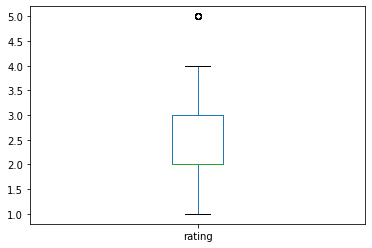

In [4]:
df.rating.plot.box()

<AxesSubplot:ylabel='Frequency'>

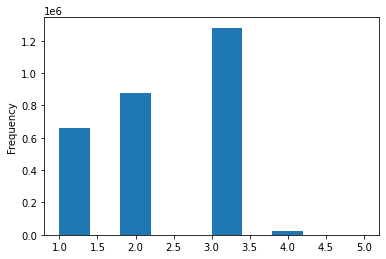

In [5]:
df.rating.plot.hist()

## Surprise

In [6]:
%pip install scikit-surprise

You should consider upgrading via the '/Users/natburgwyn/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

# load dataset from dataframe
reader = Reader()
data = Dataset.load_from_df(df, reader)

# create SVD model
algo = SVD()

# cross validate model using RMSE
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7525  0.7517  0.7517  0.7516  0.7513  0.7518  0.0004  
MAE (testset)     0.6408  0.6400  0.6399  0.6397  0.6397  0.6400  0.0004  
Fit time          142.42  146.34  145.04  163.74  150.44  149.60  7.53    
Test time         6.39    6.34    7.28    5.90    7.16    6.62    0.53    


{'test_rmse': array([0.75245174, 0.75174047, 0.75171781, 0.75156155, 0.75128621]),
 'test_mae': array([0.64083838, 0.63998487, 0.63993904, 0.63969033, 0.63973332]),
 'fit_time': (142.41658902168274,
  146.3438639640808,
  145.04014015197754,
  163.7399423122406,
  150.43551087379456),
 'test_time': (6.385686159133911,
  6.344462633132935,
  7.284207820892334,
  5.900477886199951,
  7.161453723907471)}

In [8]:
# create a test user and item
# uid - Silver Spring, MD
# iid - Assateague National Seashore Campground
uid = str(20901)
iid = str(232507)

# get prediction
prediction = algo.predict(uid, iid)
prediction.est

2.2344312155901633

## Export Model

Save model for future use with pickle

In [9]:
import pickle

pickle.dump(algo, open('./model/svd.pkl', 'wb'))